In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = ['AAPL', '^GSPC']
start = dt.datetime(2015, 12, 1)
end = dt.datetime(2022, 1, 1)

data = pdr.get_data_yahoo(stocks, start, end)
data = data['Adj Close']

In [3]:
data.head()

Symbols,AAPL,^GSPC
Date,,
2015-11-30,27.197859,2080.409912
2015-12-01,26.977148,2102.629883
2015-12-02,26.733446,2079.510010
2015-12-03,26.485149,2049.620117
2015-12-04,27.365686,2091.689941


In [5]:
log_return = np.log(data/data.shift())
log_return.head()

Symbols,AAPL,^GSPC
Date,,
2015-11-30,NaN,NaN
2015-12-01,-0.008148,0.010624
2015-12-02,-0.009075,-0.011057
2015-12-03,-0.009331,-0.014478
2015-12-04,0.032706,0.020318


# We will need beta to calculate returns

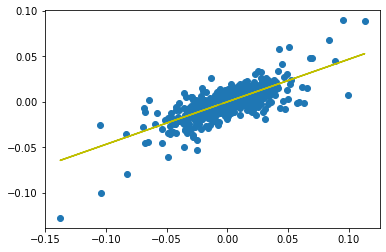

In [6]:
stock_1 = 'AAPL'
stock_2 = '^GSPC'
X = log_return[stock_1].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_return[stock_2].iloc[1:].to_numpy().reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

beta = lin_reg.coef_[0, 0]
Y_predict = lin_reg.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, Y_predict, c = 'y')

In [7]:
beta

0.46751976825107405

In [8]:
# Risk free return = 0.056
risk_free_return = 0.052
#Market return = 0.103
market_return = 0.103

#As per the CAPM formula

expected_return = risk_free_return + beta*(market_return - risk_free_return)

In [9]:
expected_return

0.07584350818080478